<a href="https://colab.research.google.com/github/aryanycce/ML-practicals/blob/main/Prac3Bonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

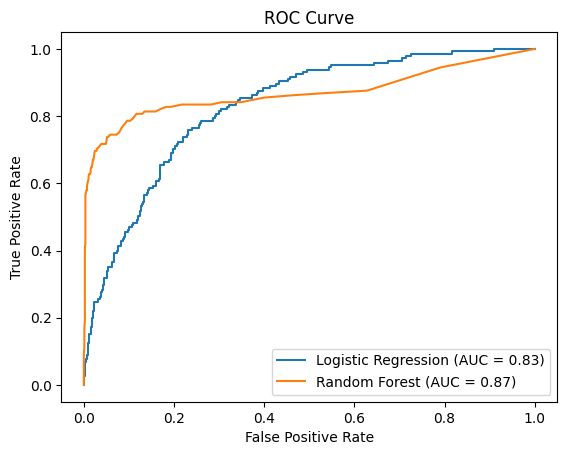

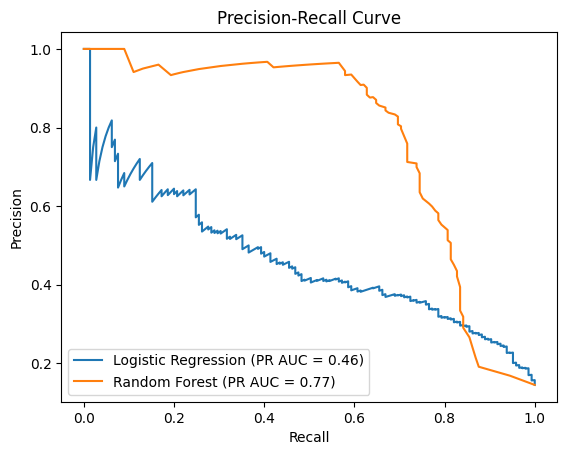

Regression Metrics: MSE = 0.06, MAE = 0.12, R2 = 0.51


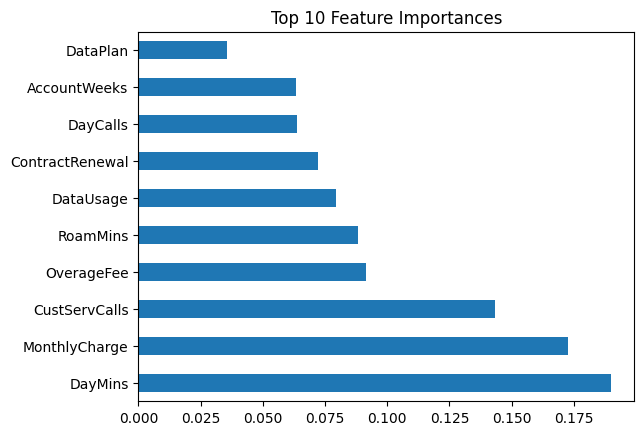

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, average_precision_score,
    mean_squared_error, mean_absolute_error, r2_score
)

# Load and preprocess the dataset
df = pd.read_csv("/content/telecom_churn.csv")  # Replace with your dataset
df = pd.get_dummies(df, drop_first=True)  # Encode categorical features
X, y = df.drop("Churn", axis=1), df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# ROC Curve for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")

# Train Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train)
y_proba_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")

# Plot combined ROC Curve
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Precision-Recall Curve for Logistic Regression
precision_log, recall_log, _ = precision_recall_curve(y_test, y_proba_log)
pr_auc_log = average_precision_score(y_test, y_proba_log)
plt.plot(recall_log, precision_log, label=f"Logistic Regression (PR AUC = {pr_auc_log:.2f})")

# Precision-Recall Curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = average_precision_score(y_test, y_proba_rf)
plt.plot(recall_rf, precision_rf, label=f"Random Forest (PR AUC = {pr_auc_rf:.2f})")

# Plot combined Precision-Recall Curve
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# Train Random Forest Regressor for Churn Probabilities
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled, y_train)
y_pred = rf_reg.predict(X_test_scaled)

# Evaluate regression
mse, mae, r2 = mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print(f"Regression Metrics: MSE = {mse:.2f}, MAE = {mae:.2f}, R2 = {r2:.2f}")

# Feature Importances for Random Forest Classifier
feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns).nlargest(10)
feature_importances.plot(kind="barh")
plt.title("Top 10 Feature Importances")
plt.show()